<a href="https://colab.research.google.com/github/rahul111jakhad/Assignment_Week1/blob/master/train_exl_EQ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_log_error
from datetime import datetime
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import activations


# Loading dataset

In [2]:
#df = pd.read_csv("http://www.exlanalytics.in/eq/frontend/web/casedata/EQ_2021_Data_Sample.csv")
dic = {'countyFIPS': 'int64',
 'stateFIPS': 'int64',
 'date': 'object',
 'confirmed_cases': 'int64',
 'deaths': 'int64',
 'google_mobility_retail_and_recreation': 'float64',
 'google_mobility_grocery_and_pharmacy': 'float64',
 'google_mobility_parks': 'float64',
 'google_mobility_transit_stations': 'float64',
 'google_mobility_workplaces': 'float64',
 'google_mobility_residential': 'float64',
 'apple_mobility_driving': 'float64',
 'apple_mobility_transit': 'float64',
 'apple_mobility_walking': 'float64',
 'Electricity_Sales_ Revenue_Residential ($ x1000)': 'float64',
 'Electricity_Sales_ Sales_Residential (MWHr)': 'float64',
 'Electricity_Sales_ Customers_Count_Residential': 'float64',
 'Electricity_Sales_ Revenue_Commercial ($ x1000)': 'float64',
 'Electricity_Sales_ Sales_Commercial (MWHr)': 'float64',
 'Electricity_Sales_ Customers_Count_Commercial': 'float64',
 'Electricity_Sales_ Revenue_Industrial ($ x1000)': 'float64',
 'Electricity_Sales_ Sales_Industrial (MWHr)': 'float64',
 'Electricity_Sales_ Customers_Count_Industrial': 'float64',
 'Electricity_Sales_ Revenue_Transportation ($ x1000)': 'float64',
 'Electricity_Sales_ Sales_Transportation (MWHr)': 'float64',
 'Electricity_Sales_ Customers_Count_Transportation': 'float64',
 'DOMESTIC_Air_Passengers': 'float64',
 'INTERNATIONAL_Air_Passengers': 'float64',
 'DOMESTIC_Flights_Cnt': 'float64',
 'INTERNATIONAL_Flights_Cnt': 'float64',
 'YoY_Reopened_Seated_Diner_Data': 'float64',
 'test_count': 'object',
 'test_rate': 'object',
 'new_test_rate': 'object',
 'new_test_count': 'object',
 'C_PCTPOVALL_2019': 'float64',
 'C_PCTPOV017_2019': 'float64',
 'C_PCTPOV517_2019': 'float64',
 'C_MEDHHINC_2019': 'float64',
 'C_TOT_POP': 'float64',
 'C_TOT_MALE': 'float64',
 'C_TOT_FEMALE': 'float64',
 'C_WA_MALE': 'float64',
 'C_WA_FEMALE': 'float64',
 'C_MinorityPCT': 'float64',
 'C_BlackPCT': 'float64',
 'C_HispanicPCT': 'float64',
 'C_M_Labour_Force_corr': 'float64',
 'C_M_Employed_corr': 'float64',
 'C_M_Unemployment_Rate_corr': 'float64',
 'S_D_dly_new_test': 'float64',
 'S_D_cummulative_test': 'float64',
 'initclaims_count_regular_cw': 'float64',
 'initclaims_rate_regular_cw': 'float64',
 'spend_all_cd': 'float64',
 'merchants_all_cd': 'float64',
 'revenue_all_cd': 'float64',
 'critical_staffing_shortage_today_yes_SD': 'float64',
 'critical_staffing_shortage_anticipated_within_week_yes_SD': 'float64',
 'hospital_onset_covid_SD': 'float64',
 'hospital_onset_covid_coverage_SD': 'float64',
 'inpatient_beds_SD': 'float64',
 'inpatient_beds_coverage_SD': 'float64',
 'previous_day_admission_adult_covid_confirmed_SD': 'float64',
 'previous_day_admission_adult_covid_suspected_SD': 'float64',
 'previous_day_admission_pediatric_covid_confirmed_SD': 'float64',
 'previous_day_admission_pediatric_covid_suspected_SD': 'float64',
 'staffed_adult_icu_bed_occupancy_SD': 'float64',
 'staffed_adult_icu_bed_occupancy_coverage_SD': 'float64',
 'staffed_icu_adult_patients_confirmed_and_suspected_covid_SD': 'float64',
 'staffed_icu_adult_patients_confirmed_covid_SD': 'float64',
 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD': 'float64',
 'total_adult_patients_hospitalized_confirmed_covid_SD': 'float64',
 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD': 'float64',
 'total_pediatric_patients_hospitalized_confirmed_covid_SD': 'float64',
 'inpatient_beds_utilization_SD': 'float64',
 'inpatient_beds_utilization_numerator_SD': 'float64',
 'inpatient_beds_utilization_denominator_SD': 'float64',
 'percent_of_inpatients_with_covid_SD': 'float64',
 'inpatient_bed_covid_utilization_SD': 'float64',
 'adult_icu_bed_covid_utilization_SD': 'float64',
 'adult_icu_bed_utilization_SD': 'float64'}

In [3]:
df = pd.read_csv("http://www.exlanalytics.in/eq/frontend/web/casedata/EQ_2021_Data_Sample.csv" , dtype = dic)
#,index_col='date', parse_dates=['date']

In [4]:
df

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,apple_mobility_transit,apple_mobility_walking,Electricity_Sales_ Revenue_Residential ($ x1000),Electricity_Sales_ Sales_Residential (MWHr),Electricity_Sales_ Customers_Count_Residential,Electricity_Sales_ Revenue_Commercial ($ x1000),Electricity_Sales_ Sales_Commercial (MWHr),Electricity_Sales_ Customers_Count_Commercial,Electricity_Sales_ Revenue_Industrial ($ x1000),Electricity_Sales_ Sales_Industrial (MWHr),Electricity_Sales_ Customers_Count_Industrial,Electricity_Sales_ Revenue_Transportation ($ x1000),Electricity_Sales_ Sales_Transportation (MWHr),Electricity_Sales_ Customers_Count_Transportation,DOMESTIC_Air_Passengers,INTERNATIONAL_Air_Passengers,DOMESTIC_Flights_Cnt,INTERNATIONAL_Flights_Cnt,YoY_Reopened_Seated_Diner_Data,test_count,test_rate,new_test_rate,new_test_count,C_PCTPOVALL_2019,C_PCTPOV017_2019,C_PCTPOV517_2019,C_MEDHHINC_2019,C_TOT_POP,...,C_WA_MALE,C_WA_FEMALE,C_MinorityPCT,C_BlackPCT,C_HispanicPCT,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,S_D_cummulative_test,initclaims_count_regular_cw,initclaims_rate_regular_cw,spend_all_cd,merchants_all_cd,revenue_all_cd,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
0,1001,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,101.51,NaN,NaN,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,.,.,.,.,12.1,15.9,14.4,58233.0,55514.0,...,21383.0,22185.0,0.2364,0.18,0.0257,26127.0,25513.0,2.4,NaN,NaN,NaN,NaN,116.0,NaN,NaN,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1003,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,103.12,NaN,94.32,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,.,.,.,.,10.1,13.5,13.3,59871.0,190790.0,...,81423.0,85193.0,0.1679,0.10,0.0458,95993.0,93689.0,2.4,NaN,NaN,NaN,NaN,269.0,-17.0,-495.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,1005,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,120.67,NaN,NaN,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,.,.,.,.,27.1,41.0,39.5,35972.0,27201.0,...,7397.0,6338.0,0.5355,0.47,0.0509,8624.0,8349.0,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,1007,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,111.18,NaN,NaN,670692.302,5414230.614,4585564.0,398194.878,3435710.506,744182.0,309206.548,5512107.536,16298.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,

### Data preprocessing

In [5]:
df.rename(columns = {'Electricity_Sales_ Revenue_Residential ($ x1000)': 'Electricity_Sales_Revenue_Residential',
 'Electricity_Sales_ Sales_Residential (MWHr)': 'Electricity_Sales_Sales_Residential',
 'Electricity_Sales_ Customers_Count_Residential': 'Electricity_Sales_Customers_Count_Residential',
 'Electricity_Sales_ Revenue_Commercial ($ x1000)': 'Electricity_Sales_Revenue_Commercial',
 'Electricity_Sales_ Sales_Commercial (MWHr)': 'Electricity_Sales_Sales_Commercial',
 'Electricity_Sales_ Customers_Count_Commercial': 'Electricity_Sales_Customers_Count_Commercial',
 'Electricity_Sales_ Revenue_Industrial ($ x1000)': 'Electricity_Sales_Revenue_Industrial',
 'Electricity_Sales_ Sales_Industrial (MWHr)': 'Electricity_Sales_Sales_Industrial',
 'Electricity_Sales_ Customers_Count_Industrial': 'Electricity_Sales_Customers_Count_Industrial',
 'Electricity_Sales_ Revenue_Transportation ($ x1000)': 'Electricity_Sales_Revenue_Transportation',
 'Electricity_Sales_ Sales_Transportation (MWHr)': 'Electricity_Sales_Sales_Transportation',
 'Electricity_Sales_ Customers_Count_Transportation':'Electricity_Sales_Customers_Count_Transportation'}, inplace = True)

In [6]:
drop_col = ['google_mobility_parks' ,'apple_mobility_transit',"apple_mobility_walking","YoY_Reopened_Seated_Diner_Data"]
df.drop(columns = drop_col ,axis =1 , inplace = True)

In [7]:
df.date = pd.to_datetime(df.date , format = "%Y-%m-%d")

In [8]:
num_cols=['test_count','test_rate', 'new_test_rate', 'new_test_count']
for i in num_cols:
    df.loc[df[i] == "." , i] = 0
df[['test_count','test_rate', 'new_test_rate', 'new_test_count']] = df[['test_count','test_rate', 'new_test_rate', 'new_test_count']].apply(pd.to_numeric)

In [9]:
for i in ['google_mobility_retail_and_recreation',
       'google_mobility_grocery_and_pharmacy',
       'google_mobility_transit_stations', 'google_mobility_workplaces',
       'google_mobility_residential', 'apple_mobility_driving',
       'Electricity_Sales_Revenue_Residential',
       'Electricity_Sales_Sales_Residential',
       'Electricity_Sales_Customers_Count_Residential',
       'Electricity_Sales_Revenue_Commercial',
       'Electricity_Sales_Sales_Commercial',
       'Electricity_Sales_Customers_Count_Commercial',
       'Electricity_Sales_Revenue_Industrial',
       'Electricity_Sales_Sales_Industrial',
       'Electricity_Sales_Customers_Count_Industrial',
       'Electricity_Sales_Revenue_Transportation',
       'Electricity_Sales_Sales_Transportation',
       'Electricity_Sales_Customers_Count_Transportation','DOMESTIC_Air_Passengers', 'INTERNATIONAL_Air_Passengers',
       'DOMESTIC_Flights_Cnt', 'INTERNATIONAL_Flights_Cnt','C_PCTPOVALL_2019',
       'C_PCTPOV017_2019', 'C_PCTPOV517_2019', 'C_MEDHHINC_2019', 'C_TOT_POP',
       'C_TOT_MALE', 'C_TOT_FEMALE', 'C_WA_MALE', 'C_WA_FEMALE',
       'C_MinorityPCT', 'C_BlackPCT', 'C_HispanicPCT', 'C_M_Labour_Force_corr',
       'C_M_Employed_corr', 'C_M_Unemployment_Rate_corr', 'S_D_dly_new_test',
       'S_D_cummulative_test', 'initclaims_count_regular_cw',
       'initclaims_rate_regular_cw', 'spend_all_cd', 'merchants_all_cd',
       'revenue_all_cd', 'critical_staffing_shortage_today_yes_SD',
       'critical_staffing_shortage_anticipated_within_week_yes_SD',
       'hospital_onset_covid_SD', 'hospital_onset_covid_coverage_SD',
       'inpatient_beds_SD', 'inpatient_beds_coverage_SD',
       'previous_day_admission_adult_covid_confirmed_SD',
       'previous_day_admission_adult_covid_suspected_SD',
       'previous_day_admission_pediatric_covid_confirmed_SD',
       'previous_day_admission_pediatric_covid_suspected_SD',
       'staffed_adult_icu_bed_occupancy_SD',
       'staffed_adult_icu_bed_occupancy_coverage_SD',
       'staffed_icu_adult_patients_confirmed_and_suspected_covid_SD',
       'staffed_icu_adult_patients_confirmed_covid_SD',
       'total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD',
       'total_adult_patients_hospitalized_confirmed_covid_SD',
       'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD',
       'total_pediatric_patients_hospitalized_confirmed_covid_SD',
       'inpatient_beds_utilization_SD',
       'inpatient_beds_utilization_numerator_SD',
       'inpatient_beds_utilization_denominator_SD',
       'percent_of_inpatients_with_covid_SD',
       'inpatient_bed_covid_utilization_SD',
       'adult_icu_bed_covid_utilization_SD', 'adult_icu_bed_utilization_SD']:
    df.loc[df[i].isna() , i] = df.loc[df[i].notnull() , i].mean()
    

In [10]:
df.isna().sum().to_dict()

{'C_BlackPCT': 0,
 'C_HispanicPCT': 0,
 'C_MEDHHINC_2019': 0,
 'C_M_Employed_corr': 0,
 'C_M_Labour_Force_corr': 0,
 'C_M_Unemployment_Rate_corr': 0,
 'C_MinorityPCT': 0,
 'C_PCTPOV017_2019': 0,
 'C_PCTPOV517_2019': 0,
 'C_PCTPOVALL_2019': 0,
 'C_TOT_FEMALE': 0,
 'C_TOT_MALE': 0,
 'C_TOT_POP': 0,
 'C_WA_FEMALE': 0,
 'C_WA_MALE': 0,
 'DOMESTIC_Air_Passengers': 0,
 'DOMESTIC_Flights_Cnt': 0,
 'Electricity_Sales_Customers_Count_Commercial': 0,
 'Electricity_Sales_Customers_Count_Industrial': 0,
 'Electricity_Sales_Customers_Count_Residential': 0,
 'Electricity_Sales_Customers_Count_Transportation': 0,
 'Electricity_Sales_Revenue_Commercial': 0,
 'Electricity_Sales_Revenue_Industrial': 0,
 'Electricity_Sales_Revenue_Residential': 0,
 'Electricity_Sales_Revenue_Transportation': 0,
 'Electricity_Sales_Sales_Commercial': 0,
 'Electricity_Sales_Sales_Industrial': 0,
 'Electricity_Sales_Sales_Residential': 0,
 'Electricity_Sales_Sales_Transportation': 0,
 'INTERNATIONAL_Air_Passengers': 0,
 'IN

In [11]:
unique_state = df.stateFIPS.unique()
unique_state

array([ 1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

In [12]:
unique_county = df.countyFIPS.unique()
unique_county[:10]

array([1001, 1003, 1005, 1007, 1009, 1011, 1013, 1015, 1017, 1019])

In [13]:
# Creating list of all regions of all countries
unique_regions=df['stateFIPS'].unique()
states_per_regions=[]
for reg in tqdm(unique_regions):
    states_per_regions.append(df[df['stateFIPS']==reg]['countyFIPS'].unique()) 
print('No of unique regions:',len(unique_regions))

100%|██████████| 51/51 [00:00<00:00, 85.89it/s]

No of unique regions: 51


# Plotting dependency

In [14]:
df.total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD.value_counts()

 0.000000      472128
 23.334138      98550
 3.000000       22165
 4.000000       21733
 6.000000       19090
                ...  
 219.000000        59
 241.000000        59
 195.000000        21
-12.000000         21
 259.000000        14
Name: total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD, Length: 284, dtype: int64

In [15]:
df.loc[df.countyFIPS == 1001 , "total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD"].values

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

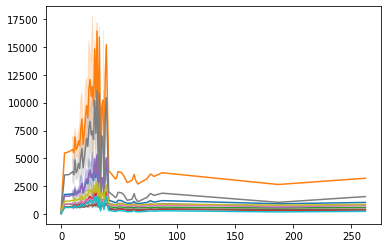

In [16]:

county_plot = [1001, 1003, 1005, 1007, 1009, 1011, 1013, 1015, 1017, 1019]
#col  = total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD
x = df.loc[df.countyFIPS == i , "total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD"]
y = df.loc[df.confirmed_cases == i , "total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD"]
for i in county_plot:
    sns.lineplot(x = df.loc[df.countyFIPS == i , "total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD"].values , y = df.loc[df.countyFIPS == i , "confirmed_cases"].values )

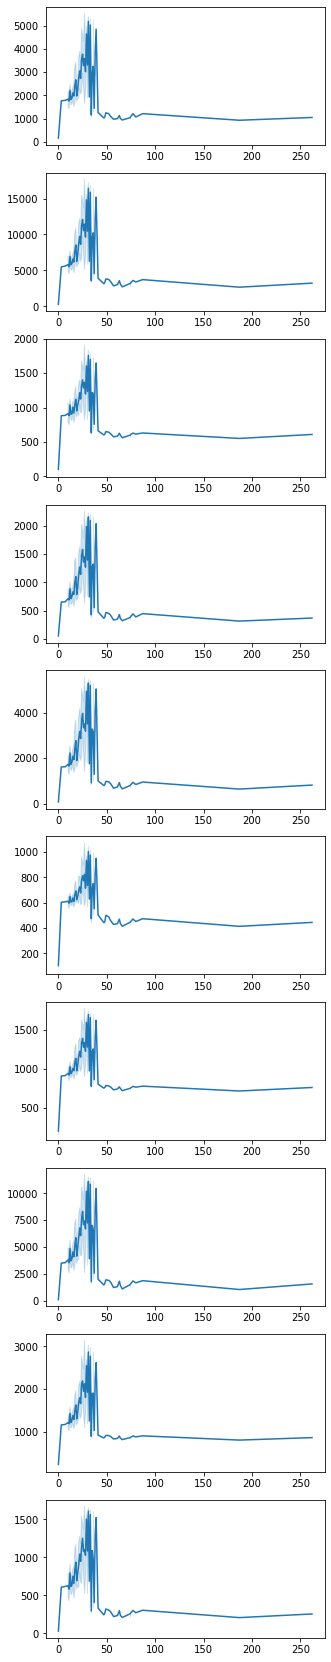

In [17]:
fig, axes = plt.subplots(10, 1, figsize=(5, 30))
count = 0
for i in [1001, 1003, 1005, 1007, 1009, 1011, 1013, 1015, 1017, 1019]:
    
    pl = df.loc[df.countyFIPS == i, ["confirmed_cases" , "date"]]
    sns.lineplot(x = df.loc[df.countyFIPS == i , "total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD"].values , y = df.loc[df.countyFIPS == i , "confirmed_cases"].values, ax = axes[count])
    count=count+1

# Adding and deleting columns from df

In [18]:
df["google_mobility"] = df["google_mobility_retail_and_recreation"] + df.google_mobility_grocery_and_pharmacy + df.google_mobility_transit_stations + df.google_mobility_workplaces  + df.google_mobility_residential 

In [19]:
df["electricity_sales"] = df["Electricity_Sales_Sales_Commercial"] +df["Electricity_Sales_Sales_Transportation"] + df["Electricity_Sales_Sales_Industrial"]
df["electricity_revenue"] = df["Electricity_Sales_Revenue_Residential"] + df["Electricity_Sales_Revenue_Industrial"] + df["Electricity_Sales_Revenue_Transportation"]
df["electricity_customers"] = df["Electricity_Sales_Customers_Count_Residential"] + df["Electricity_Sales_Customers_Count_Commercial"] + df["Electricity_Sales_Customers_Count_Transportation"]

In [20]:
df["air_passenger"] = df.DOMESTIC_Air_Passengers + df.INTERNATIONAL_Air_Passengers
df["total_flight"]  = df.DOMESTIC_Flights_Cnt + df.INTERNATIONAL_Flights_Cnt

In [21]:
df["onset_covid_inpatient_per_hospital"] = (df['hospital_onset_covid_SD'] / df['hospital_onset_covid_coverage_SD']).fillna(0)
df["inpatient_beds_per_hospital"] = (df['inpatient_beds_SD'] / df['inpatient_beds_coverage_SD']).fillna(0)
df["ICU_beds_occupancy_per_hospital"] = (df['staffed_adult_icu_bed_occupancy_SD'] / df['staffed_adult_icu_bed_occupancy_coverage_SD']).fillna(0)


In [22]:
len(df.columns)

87

In [23]:
new_df= df.copy()

In [24]:
new_df= new_df.drop(['google_mobility_retail_and_recreation',
       'google_mobility_grocery_and_pharmacy',
       'google_mobility_transit_stations', 'google_mobility_workplaces',
       'google_mobility_residential' ,
       'Electricity_Sales_Revenue_Commercial',
       'Electricity_Sales_Sales_Commercial',
       'Electricity_Sales_Customers_Count_Commercial',
       'Electricity_Sales_Revenue_Industrial',
       'Electricity_Sales_Sales_Industrial',
       'Electricity_Sales_Customers_Count_Industrial',
       'Electricity_Sales_Revenue_Transportation',
       'Electricity_Sales_Sales_Transportation',
       'Electricity_Sales_Customers_Count_Transportation' ,
       'DOMESTIC_Air_Passengers', 'INTERNATIONAL_Air_Passengers',
       'DOMESTIC_Flights_Cnt', 'INTERNATIONAL_Flights_Cnt', 'test_rate', 'new_test_rate', 
       'staffed_icu_adult_patients_confirmed_covid_SD',
              "hospital_onset_covid_SD",
              "hospital_onset_covid_coverage_SD",
              "inpatient_beds_SD",
              "inpatient_beds_coverage_SD",
              "staffed_adult_icu_bed_occupancy_SD",
              
              
        "total_adult_patients_hospitalized_confirmed_covid_SD",
        "total_pediatric_patients_hospitalized_confirmed_covid_SD",
             "staffed_adult_icu_bed_occupancy_coverage_SD",
        #'S_D_dly_new_test',
       'S_D_cummulative_test', 
              "initclaims_count_regular_cw"
              ] , axis =1)

In [25]:
len(new_df.columns)

56

# Normalizing the dataset

In [26]:
max_columns = {}
min_columns = {}

In [27]:
for feature_name in tqdm(new_df.columns):
    if(feature_name == "countyFIPS" or feature_name == "stateFIPS" or feature_name == "date" or feature_name == "confirmed_cases" or feature_name == "deaths"):
        continue
    max_value = new_df[feature_name].max()
    min_value = new_df[feature_name].min()
    max_columns.update({feature_name:max_value})
    min_columns.update({feature_name:min_value})
    new_df[feature_name] = (new_df[feature_name] - min_value) / (max_value - min_value)
    #new_df[feature_name] = (new_df[feature_name] ) / (max_value)


100%|██████████| 56/56 [00:00<00:00, 103.78it/s]


In [28]:
len(max_columns)

51

In [29]:
max_value_df = pd.DataFrame(max_columns.items() , index = max_columns.keys() ).drop(columns = 0 , axis =1)
max_value_df = max_value_df.rename(columns = {1:"max_value"})
max_value_df.to_csv("max_value_traindata.csv")

In [30]:
min_value_df = pd.DataFrame(min_columns.items() , index = min_columns.keys() ).drop(columns = 0 , axis =1)
min_value_df = min_value_df.rename(columns = {1:"min_vaue"})
min_value_df.to_csv("min_value_traindata.csv")

In [31]:
max_columns.items()

dict_items([('apple_mobility_driving', 2148.12), ('Electricity_Sales_Revenue_Residential', 4397367.76), ('Electricity_Sales_Sales_Residential', 37220987.92), ('Electricity_Sales_Customers_Count_Residential', 28564656.0), ('test_count', 41980456), ('new_test_count', 359451), ('C_PCTPOVALL_2019', 47.7), ('C_PCTPOV017_2019', 63.4), ('C_PCTPOV517_2019', 55.0), ('C_MEDHHINC_2019', 151806.0), ('C_TOT_POP', 9962789.0), ('C_TOT_MALE', 4914006.0), ('C_TOT_FEMALE', 5048783.0), ('C_WA_MALE', 3571798.0), ('C_WA_FEMALE', 3560611.0), ('C_MinorityPCT', 0.9683), ('C_BlackPCT', 0.85), ('C_HispanicPCT', 0.9563), ('C_M_Labour_Force_corr', 5222823.0), ('C_M_Employed_corr', 4984604.0), ('C_M_Unemployment_Rate_corr', 41.0), ('S_D_dly_new_test', 371033.0), ('initclaims_rate_regular_cw', 999.0), ('spend_all_cd', 999.0), ('merchants_all_cd', 999.0), ('revenue_all_cd', 999.0), ('critical_staffing_shortage_today_yes_SD', 188.0), ('critical_staffing_shortage_anticipated_within_week_yes_SD', 199.0), ('previous_day

In [32]:
min_columns

{'C_BlackPCT': 0.0,
 'C_HispanicPCT': 0.0019,
 'C_MEDHHINC_2019': 24732.0,
 'C_M_Employed_corr': 161.0,
 'C_M_Labour_Force_corr': 171.0,
 'C_M_Unemployment_Rate_corr': 0.0,
 'C_MinorityPCT': 0.0136,
 'C_PCTPOV017_2019': 2.4,
 'C_PCTPOV517_2019': 2.2,
 'C_PCTPOVALL_2019': 2.7,
 'C_TOT_FEMALE': 33.0,
 'C_TOT_MALE': 38.0,
 'C_TOT_POP': 71.0,
 'C_WA_FEMALE': 11.0,
 'C_WA_MALE': 14.0,
 'Electricity_Sales_Customers_Count_Residential': 554572.0,
 'Electricity_Sales_Revenue_Residential': 40974.193999999996,
 'Electricity_Sales_Sales_Residential': 280324.13,
 'ICU_beds_occupancy_per_hospital': 0.0,
 'S_D_dly_new_test': 0.0,
 'adult_icu_bed_covid_utilization_SD': 0.0,
 'adult_icu_bed_utilization_SD': 0.0,
 'air_passenger': 109198.0,
 'apple_mobility_driving': 7.03,
 'critical_staffing_shortage_anticipated_within_week_yes_SD': 0.0,
 'critical_staffing_shortage_today_yes_SD': 0.0,
 'electricity_customers': 625626.0,
 'electricity_revenue': 48414.373999999996,
 'electricity_sales': 451723.65,
 'goo

In [33]:
new_df.head()

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,apple_mobility_driving,Electricity_Sales_Revenue_Residential,Electricity_Sales_Sales_Residential,Electricity_Sales_Customers_Count_Residential,test_count,new_test_count,C_PCTPOVALL_2019,C_PCTPOV017_2019,C_PCTPOV517_2019,C_MEDHHINC_2019,C_TOT_POP,C_TOT_MALE,C_TOT_FEMALE,C_WA_MALE,C_WA_FEMALE,C_MinorityPCT,C_BlackPCT,C_HispanicPCT,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,initclaims_rate_regular_cw,spend_all_cd,merchants_all_cd,revenue_all_cd,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,google_mobility,electricity_sales,electricity_revenue,electricity_customers,air_passenger,total_flight,onset_covid_inpatient_per_hospital,inpatient_beds_per_hospital,ICU_beds_occupancy_per_hospital
0,1001,1,2020-01-22,0,0,0.044127,0.14455,0.138977,0.143912,0.0,0.0,0.208889,0.221311,0.231061,0.263634,0.005565,0.005498,0.005631,0.005983,0.006228,0.233372,0.211765,0.024937,0.004970,0.005086,0.058537,0.059203,0.347499,0.558058,0.380577,0.398017,0.0,0.0,0.0,0.0,0.27193,0.741235,0.0,0.0,0.009023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.422576,0.180719,0.161751,0.149528,0.59665,0.570673,0.0,0.005594,0.0
1,1003,1,2020-01-22,0,0,0.044879,0.14455,0.138977,0.143912,0.0,0.0,0.164444,0.181967,0.210227,0.276524,0.019143,0.018925,0.019356,0.022792,0.023923,0.161621,0.117647,0.045997,0.018347,0.018764,0.058537,0.059203,0.347499,0.634635,0.491491,0.252252,0.0,0.0,0.0,0.0,0.27193,0.741235,0.0,0.0,0.009023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.422576,0.180719,0.161751,0.149528,0.59665,0.570673,0.0,0.005594,0.0
2,1005,1,2020-01-22,0,0,0.053076,0.14455,0.138977,0.143912,0.0,0.0,0.542222,0.632787,0.706439,0.088452,0.002723,0.002964,0.002489,0.002067,0.001777,0.546664,0.552941,0.051341,0.001619,0.001643,0.078049,0.059203,0.347499,0.451717,0.380577,0.398017,0.0,0.0,0.0,0.0,0.27193,0.741235,0.0,0.0,0.009023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.422576,0.180719,0.161751,0.149528,0.59665,0.570673,0.0,0.005594,0.0
3,1007,1,2020-01-22,0,0,0.048643,0.14455,0.138977,0.143912,0.0,0.0,0.391111,0.385246,0.435606,0.182461,0.002261,0.002474,0.002054,0.002489,0.002335,0.252331,0.258824,0.019384,0.001643,0.001680,0.060976,0.059203,0.347499,0.451717,0.380577,0.398017,0.0,0.0,0.0,0.0,0.27193,0.741235,0.0,0.0,0.009023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.422576,0.180719,0.161751,0.149528,0.59665,0.570673,0.0,0.005594,0.0
4,1009,1,2020-01-22,0,0,0.039480,0.14455,0.138977,0.143912,0.0,0.0,0.302222,0.304918,0.363636,0.221682,0.005797,0.005813,0.005782,0.007695,0.007897,0.110506,0.023529,0.088118,0.004851,0.004969,0.056098,0.059203,0.347499,0.195195,0.380577,0.398017,0.0,0.0,0.0,0.0,0.27193,0.741235,0.0,0.0,0.009023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.422576,0.180719,0.161751,0.149528,0.59665,0.570673,0.0,0.005594,0.0


In [34]:
new_df.isna().sum().to_dict()

{'C_BlackPCT': 0,
 'C_HispanicPCT': 0,
 'C_MEDHHINC_2019': 0,
 'C_M_Employed_corr': 0,
 'C_M_Labour_Force_corr': 0,
 'C_M_Unemployment_Rate_corr': 0,
 'C_MinorityPCT': 0,
 'C_PCTPOV017_2019': 0,
 'C_PCTPOV517_2019': 0,
 'C_PCTPOVALL_2019': 0,
 'C_TOT_FEMALE': 0,
 'C_TOT_MALE': 0,
 'C_TOT_POP': 0,
 'C_WA_FEMALE': 0,
 'C_WA_MALE': 0,
 'Electricity_Sales_Customers_Count_Residential': 0,
 'Electricity_Sales_Revenue_Residential': 0,
 'Electricity_Sales_Sales_Residential': 0,
 'ICU_beds_occupancy_per_hospital': 0,
 'S_D_dly_new_test': 0,
 'adult_icu_bed_covid_utilization_SD': 0,
 'adult_icu_bed_utilization_SD': 0,
 'air_passenger': 0,
 'apple_mobility_driving': 0,
 'confirmed_cases': 0,
 'countyFIPS': 0,
 'critical_staffing_shortage_anticipated_within_week_yes_SD': 0,
 'critical_staffing_shortage_today_yes_SD': 0,
 'date': 0,
 'deaths': 0,
 'electricity_customers': 0,
 'electricity_revenue': 0,
 'electricity_sales': 0,
 'google_mobility': 0,
 'initclaims_rate_regular_cw': 0,
 'inpatient_bed_

In [35]:
new_df.shape

(1179375, 56)

# Training data

In [36]:
unique_county

array([ 1001,  1003,  1005, ..., 56041, 56043, 56045])

In [37]:
province_df = new_df.query(f"stateFIPS=='{1}' and countyFIPS=='{1003}'")

In [38]:
for col in province_df.columns:
   
    print(province_df[col].unique().size , col)

1 countyFIPS
1 stateFIPS
375 date
304 confirmed_cases
83 deaths
373 apple_mobility_driving
12 Electricity_Sales_Revenue_Residential
12 Electricity_Sales_Sales_Residential
12 Electricity_Sales_Customers_Count_Residential
317 test_count
320 new_test_count
1 C_PCTPOVALL_2019
1 C_PCTPOV017_2019
1 C_PCTPOV517_2019
1 C_MEDHHINC_2019
1 C_TOT_POP
1 C_TOT_MALE
1 C_TOT_FEMALE
1 C_WA_MALE
1 C_WA_FEMALE
1 C_MinorityPCT
1 C_BlackPCT
1 C_HispanicPCT
13 C_M_Labour_Force_corr
13 C_M_Employed_corr
11 C_M_Unemployment_Rate_corr
326 S_D_dly_new_test
19 initclaims_rate_regular_cw
304 spend_all_cd
204 merchants_all_cd
249 revenue_all_cd
24 critical_staffing_shortage_today_yes_SD
24 critical_staffing_shortage_anticipated_within_week_yes_SD
141 previous_day_admission_adult_covid_confirmed_SD
15 previous_day_admission_adult_covid_suspected_SD
14 previous_day_admission_pediatric_covid_confirmed_SD
19 previous_day_admission_pediatric_covid_suspected_SD
162 staffed_icu_adult_patients_confirmed_and_suspected_covi

In [39]:
temporal_variable = []
demographic_variable = []
province_df = new_df.query(f"stateFIPS=='{1}' and countyFIPS=='{1003}'")
for col in tqdm(province_df.columns):
   
    #print(province_df[col].unique().size , col)
    if(province_df[col].unique().size != 1):
        temporal_variable.append(col)
    else:
        demographic_variable.append(col)
        



    

100%|██████████| 56/56 [00:00<00:00, 6755.67it/s]


In [40]:
temporal_variable.remove("date" )
temporal_variable.remove("deaths" )


In [41]:
count = 1
for i in temporal_variable:
    print(i , count)
    count = count+1

confirmed_cases 1
apple_mobility_driving 2
Electricity_Sales_Revenue_Residential 3
Electricity_Sales_Sales_Residential 4
Electricity_Sales_Customers_Count_Residential 5
test_count 6
new_test_count 7
C_M_Labour_Force_corr 8
C_M_Employed_corr 9
C_M_Unemployment_Rate_corr 10
S_D_dly_new_test 11
initclaims_rate_regular_cw 12
spend_all_cd 13
merchants_all_cd 14
revenue_all_cd 15
critical_staffing_shortage_today_yes_SD 16
critical_staffing_shortage_anticipated_within_week_yes_SD 17
previous_day_admission_adult_covid_confirmed_SD 18
previous_day_admission_adult_covid_suspected_SD 19
previous_day_admission_pediatric_covid_confirmed_SD 20
previous_day_admission_pediatric_covid_suspected_SD 21
staffed_icu_adult_patients_confirmed_and_suspected_covid_SD 22
total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD 23
total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD 24
inpatient_beds_utilization_SD 25
inpatient_beds_utilization_numerator_SD 26
inpatient_beds_utilizati

In [42]:
demographic_variable.remove("countyFIPS")
demographic_variable.remove("stateFIPS")

In [43]:
count = 1
for i in demographic_variable:
    print(i , count)
    count = count+1

C_PCTPOVALL_2019 1
C_PCTPOV017_2019 2
C_PCTPOV517_2019 3
C_MEDHHINC_2019 4
C_TOT_POP 5
C_TOT_MALE 6
C_TOT_FEMALE 7
C_WA_MALE 8
C_WA_FEMALE 9
C_MinorityPCT 10
C_BlackPCT 11
C_HispanicPCT 12


In [44]:
new_df.columns

Index(['countyFIPS', 'stateFIPS', 'date', 'confirmed_cases', 'deaths',
       'apple_mobility_driving', 'Electricity_Sales_Revenue_Residential',
       'Electricity_Sales_Sales_Residential',
       'Electricity_Sales_Customers_Count_Residential', 'test_count',
       'new_test_count', 'C_PCTPOVALL_2019', 'C_PCTPOV017_2019',
       'C_PCTPOV517_2019', 'C_MEDHHINC_2019', 'C_TOT_POP', 'C_TOT_MALE',
       'C_TOT_FEMALE', 'C_WA_MALE', 'C_WA_FEMALE', 'C_MinorityPCT',
       'C_BlackPCT', 'C_HispanicPCT', 'C_M_Labour_Force_corr',
       'C_M_Employed_corr', 'C_M_Unemployment_Rate_corr', 'S_D_dly_new_test',
       'initclaims_rate_regular_cw', 'spend_all_cd', 'merchants_all_cd',
       'revenue_all_cd', 'critical_staffing_shortage_today_yes_SD',
       'critical_staffing_shortage_anticipated_within_week_yes_SD',
       'previous_day_admission_adult_covid_confirmed_SD',
       'previous_day_admission_adult_covid_suspected_SD',
       'previous_day_admission_pediatric_covid_confirmed_SD',
     

In [45]:
#Just getting rid of the first days to have a multiple of 7
#Makes it easier to generate the sequences

days_in_sequence = 21

trend_list = []

with tqdm(total=len(list(new_df.stateFIPS.unique()))) as pbar:
    for country in new_df.stateFIPS.unique():
        for province in new_df.query(f"stateFIPS=='{country}'").countyFIPS.unique():
            province_df = new_df.query(f"stateFIPS=='{country}' and countyFIPS=='{province}'")
            
            #I added a quick hack to double the number of sequences
            #Warning: This will later create a minor leakage from the 
            # training set into the validation set.
            for i in range(0,len(province_df),int(days_in_sequence/3)):
                if i+days_in_sequence<=len(province_df):
                    
                    #prepare all the temporal inputs
                 
                    infection_trend = [float(x) for x in province_df[i:i+days_in_sequence-1].confirmed_cases.values]
                    apple_mobility_driving   = [float(x) for x in province_df[i:i+days_in_sequence-1].apple_mobility_driving.values]
                    Electricity_Sales_Revenue_Residential    =   [float(x) for x in province_df[i:i+days_in_sequence-1]['Electricity_Sales_Revenue_Residential'].values]
                    Electricity_Sales_Sales_Residential      =   [float(x) for x in province_df[i:i+days_in_sequence-1]['Electricity_Sales_Sales_Residential'].values]
                    Electricity_Sales_Customers_Count_Residential =  [float(x) for x in province_df[i:i+days_in_sequence-1]['Electricity_Sales_Customers_Count_Residential'].values]
                    #Electricity_Sales_Revenue_Commercial =      [float(x) for x in province_df[i:i+days_in_sequence-1]['Electricity_Sales_ Revenue_Commercial ($ x1000)'].values]
                    #Electricity_Sales_Sales_Commercial=      [float(x) for x in province_df[i:i+days_in_sequence-1]["Electricity_Sales_ Sales_Commercial (MWHr)"].values]
                    #Electricity_Sales_Customers_Count_Commercial =     [float(x) for x in province_df[i:i+days_in_sequence-1]['Electricity_Sales_ Customers_Count_Commercial'].values]
                    #Electricity_Sales_Revenue_Industrial  =    [float(x) for x in province_df[i:i+days_in_sequence-1]['Electricity_Sales_ Revenue_Industrial ($ x1000)'].values]
                    #Electricity_Sales_Sales_Industrial=    [float(x) for x in province_df[i:i+days_in_sequence-1][' Electricity_Sales_ Sales_Industrial (MWHr)']).values ]
                    #Electricity_Sales_Revenue_Transportation  =      [float(x) for x in province_df[i:i+days_in_sequence-1][  " Electricity_Sales_ Revenue_Transportation ($ x1000)"].values]
                    #Electricity_Sales_Sales_Transportation  =     [float(x) for x in province_df[i:i+days_in_sequence-1]['Electricity_Sales_ Sales_Transportation (MWHr))'].values]
                    #Electricity_Sales_Customers_Count_Transportation =      [float(x) for x in province_df[i:i+days_in_sequence-1]['Electricity_Sales_ Customers_Count_Transportation'].values]
                    #DOMESTIC_Air_Passengers =     [float(x) for x in province_df[i:i+days_in_sequence-1]['DOMESTIC_Air_Passengers'].values]
                    #INTERNATIONAL_Air_Passenger  =      [float(x) for x in province_df[i:i+days_in_sequence-1]['INTERNATIONAL_Air_Passenger'].values]
                    #DOMESTIC_Flights_Cnt =      [float(x) for x in province_df[i:i+days_in_sequence-1]['DOMESTIC_Flights_Cnt'].values]
                    #INTERNATIONAL_Flights_Cnt =      [float(x) for x in province_df[i:i+days_in_sequence-1]['INTERNATIONAL_Flights_Cnt'].values]
                    test_count=     [float(x) for x in province_df[i:i+days_in_sequence-1].test_count.values]
                    #test_rate  =     [float(x) for x in province_df[i:i+days_in_sequence-1].test_rate.values]
                    #new_test_rate =      [float(x) for x in province_df[i:i+days_in_sequence-1].new_test_rate.values]
                    new_test_count =    [float(x) for x in province_df[i:i+days_in_sequence-1].new_test_count.values]
                    C_M_Labour_Force_corr =    [float(x) for x in province_df[i:i+days_in_sequence-1].C_M_Labour_Force_corr.values]
                    C_M_Employed_corr =    [float(x) for x in province_df[i:i+days_in_sequence-1].C_M_Employed_corr.values]
                    C_M_Unemployment_Rate_corr =    [float(x) for x in province_df[i:i+days_in_sequence-1]['C_M_Unemployment_Rate_corr'].values]
                    
                    #initclaims_count_regular_cw = [float(x) for x in province_df[i:i+days_in_sequence-1]['initclaims_count_regular_cw'].values]

                    initclaims_rate_regular_cw= [float(x) for x in province_df[i:i+days_in_sequence-1]['initclaims_rate_regular_cw'].values]
                    spend_all_cd= [float(x) for x in province_df[i:i+days_in_sequence-1]['spend_all_cd'].values]
                    
                    S_D_dly_new_test =    [float(x) for x in province_df[i:i+days_in_sequence-1]['S_D_dly_new_test'].values]
                    #S_D_cummulative_test =     [float(x) for x in province_df[i:i+days_in_sequence-1]['S_D_cummulative_test']).values]
                    critical_staffing_shortage_today_yes_SD =   [float(x) for x in province_df[i:i+days_in_sequence-1]['critical_staffing_shortage_today_yes_SD'].values]
                    critical_staffing_shortage_anticipated_within_week_yes_SD =     [float(x) for x in province_df[i:i+days_in_sequence-1]['critical_staffing_shortage_anticipated_within_week_yes_SD'].values]
                    
                    #hospital_onset_covid_SD  =     [float(x) for x in province_df[i:i+days_in_sequence-1]['hospital_onset_covid_SD'].values]
                    #hospital_onset_covid_coverage_SD =   [float(x) for x in province_df[i:i+days_in_sequence-1]['hospital_onset_covid_coverage_SD'].values]
                    #inpatient_beds_SD =    [float(x) for x in province_df[i:i+days_in_sequence-1]['inpatient_beds_SD'].values]
                    #inpatient_beds_coverage_SD =    [float(x) for x in province_df[i:i+days_in_sequence-1]['inpatient_beds_coverage_SD'].values]
                    previous_day_admission_adult_covid_confirmed_SD =    [float(x) for x in province_df[i:i+days_in_sequence-1]['previous_day_admission_adult_covid_confirmed_SD'].values]
                    previous_day_admission_adult_covid_suspected_SD =    [float(x) for x in province_df[i:i+days_in_sequence-1]['previous_day_admission_adult_covid_suspected_SD'].values]
                    previous_day_admission_pediatric_covid_confirmed_SD =   [float(x) for x in province_df[i:i+days_in_sequence-1]['previous_day_admission_pediatric_covid_confirmed_SD'].values]
                    previous_day_admission_pediatric_covid_suspected_SD =    [float(x) for x in province_df[i:i+days_in_sequence-1]['previous_day_admission_pediatric_covid_suspected_SD'].values]
                    #staffed_adult_icu_bed_occupancy_SD =    [float(x) for x in province_df[i:i+days_in_sequence-1]['staffed_adult_icu_bed_occupancy_SD'].values]
                    #staffed_adult_icu_bed_occupancy_coverage_SD =   [float(x) for x in province_df[i:i+days_in_sequence-1]['staffed_adult_icu_bed_occupancy_coverage_SD'].values]
                    staffed_icu_adult_patients_confirmed_and_suspected_covid_SD =   [float(x) for x in province_df[i:i+days_in_sequence-1]['staffed_icu_adult_patients_confirmed_and_suspected_covid_SD'].values]
                    #staffed_icu_adult_patients_confirmed_covid_SD =    [float(x) for x in province_df[i:i+days_in_sequence-1]['staffed_icu_adult_patients_confirmed_covid_SD'].values]
                    total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD =   [float(x) for x in province_df[i:i+days_in_sequence-1]['total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD'].values]
                    #total_adult_patients_hospitalized_confirmed_covid_SD =    [float(x) for x in province_df[i:i+days_in_sequence-1]['total_adult_patients_hospitalized_confirmed_covid_SD'].values]
                    total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD =     [float(x) for x in province_df[i:i+days_in_sequence-1]['total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD'].values]
                    #total_pediatric_patients_hospitalized_confirmed_covid_SD =    [float(x) for x in province_df[i:i+days_in_sequence-1]['total_pediatric_patients_hospitalized_confirmed_covid_SD'].values]
                    inpatient_beds_utilization_SD =   [float(x) for x in province_df[i:i+days_in_sequence-1]['inpatient_beds_utilization_SD'].values]
                    inpatient_beds_utilization_numerator_SD =     [float(x) for x in province_df[i:i+days_in_sequence-1]['inpatient_beds_utilization_numerator_SD'].values]
                    inpatient_beds_utilization_denominator_SD =    [float(x) for x in province_df[i:i+days_in_sequence-1]['inpatient_beds_utilization_denominator_SD'].values]
                    percent_of_inpatients_with_covid_SD =     [float(x) for x in province_df[i:i+days_in_sequence-1]['percent_of_inpatients_with_covid_SD'].values]
                    inpatient_bed_covid_utilization_SD =   [float(x) for x in province_df[i:i+days_in_sequence-1]['inpatient_bed_covid_utilization_SD'].values]
                    adult_icu_bed_covid_utilization_SD =   [float(x) for x in province_df[i:i+days_in_sequence-1]['adult_icu_bed_covid_utilization_SD'].values]
                    adult_icu_bed_utilization_SD =    [float(x) for x in province_df[i:i+days_in_sequence-1]['adult_icu_bed_utilization_SD'].values]
                    #deaths = [float(x) for x in province_df[i:i+days_in_sequence-1]['deaths'].values]
      
                    #newly added
                    google_mobility = [float(x) for x in province_df[i:i+days_in_sequence-1]['google_mobility'].values]
                    electricity_sales  = [float(x) for x in province_df[i:i+days_in_sequence-1]['electricity_sales'].values]
                    electricity_revenue = [float(x) for x in province_df[i:i+days_in_sequence-1]['electricity_revenue'].values]
                    electricity_customers = [float(x) for x in province_df[i:i+days_in_sequence-1]['electricity_customers'].values]
                    air_passenger = [float(x) for x in province_df[i:i+days_in_sequence-1]['air_passenger'].values]
                    total_flight = [float(x) for x in province_df[i:i+days_in_sequence-1]['total_flight'].values]
                    onset_covid_inpatient_per_hospital = [float(x) for x in province_df[i:i+days_in_sequence-1]['onset_covid_inpatient_per_hospital'].values]
                    inpatient_beds_per_hospital = [float(x) for x in province_df[i:i+days_in_sequence-1]['inpatient_beds_per_hospital'].values]
                    ICU_beds_occupancy_per_hospital = [float(x) for x in province_df[i:i+days_in_sequence-1]['ICU_beds_occupancy_per_hospital'].values]
                    revenue_all_cd = [float(x) for x in province_df[i:i+days_in_sequence-1]['revenue_all_cd'].values]
                    merchants_all_cd = [float(x) for x in province_df[i:i+days_in_sequence-1]['merchants_all_cd'].values]
                    
                    
                   
                                                                   
                    
                    #google_mobility_retail_and_recreation = float(province_df.iloc[i].google_mobility_retail_and_recreation)
                    #google_mobility_grocery_and_pharmacy = float(province_df.iloc[i].google_mobility_grocery_and_pharmacy)
                    #google_mobility_transit_stations   = float(province_df.iloc[i].google_mobility_transit_stations)
                    #google_mobility_workplaces   = float(province_df.iloc[i].google_mobility_workplaces)
                    #google_mobility_residential   = float(province_df.iloc[i].google_mobility_residential)
                    
                    C_PCTPOVALL_2019= float(province_df.iloc[i].C_PCTPOVALL_2019)
                    C_PCTPOV017_2019= float(province_df.iloc[i].C_PCTPOV017_2019)
                    C_PCTPOV517_2019= float(province_df.iloc[i].C_PCTPOV517_2019)
                    C_MEDHHINC_2019= float(province_df.iloc[i].C_MEDHHINC_2019)
                    C_TOT_POP= float(province_df.iloc[i].C_TOT_POP)
                    C_TOT_MALE = float(province_df.iloc[i].C_TOT_MALE)
                    C_TOT_FEMALE = float(province_df.iloc[i].C_TOT_FEMALE)
                    C_WA_MALE= float(province_df.iloc[i].C_WA_MALE)
                    C_WA_FEMALE= float(province_df.iloc[i].C_WA_FEMALE)
                    C_MinorityPCT= float(province_df.iloc[i].C_MinorityPCT) 
                    C_BlackPCT= float(province_df.iloc[i].C_BlackPCT)
                    C_HispanicPCT= float(province_df.iloc[i].C_HispanicPCT)
                    #initclaims_count_regular_cw = float(province_df.iloc[i].initclaims_count_regular_cw)
                    #merchants_all_cd= float(province_df.iloc[i].merchants_all_cd)
                    #revenue_all_cd = float(province_df.iloc[i].revenue_all_cd)                                                                                    
                                                                   

                    confirmed_cases = float(province_df.iloc[i+days_in_sequence-1].confirmed_cases)

                    trend_list.append({ "infection_trend" :infection_trend,
                                       #"deaths" :deaths,
                                       "apple_mobility_driving":apple_mobility_driving,
                        "Electricity_Sales_Revenue_Residential" : Electricity_Sales_Revenue_Residential,
                        "Electricity_Sales_Sales_Residential": Electricity_Sales_Sales_Residential,
                        "Electricity_Sales_Customers_Count_Residential" : Electricity_Sales_Customers_Count_Residential,
                        #"Electricity_Sales_Revenue_Commercial" : Electricity_Sales_Revenue_Commercial,
                        #"Electricity_Sales_Sales_Commercial" : Electricity_Sales_Sales_Commercial,
                        #"Electricity_Sales_Customers_Count_Commercial" : Electricity_Sales_Customers_Count_Commercial,
                        #"Electricity_Sales_Revenue_Industrial" : Electricity_Sales_Revenue_Industrial,
                        #"Electricity_Sales_Sales_Industrial"  : Electricity_Sales_Sales_Industrial,
                        #"Electricity_Sales_Customers_Count_Industrial" : Electricity_Sales_Customers_Count_Industrial,
                        #"Electricity_Sales_Revenue_Transportation" : Electricity_Sales_Revenue_Transportation,
                        #"Electricity_Sales_Sales_Transportation"  : Electricity_Sales_Sales_Transportation ,
                        #"Electricity_Sales_Customers_Count_Transportation" : Electricity_Sales_Customers_Count_Transportation,
                        #"DOMESTIC_Air_Passengers" : DOMESTIC_Air_Passengers,
                        #"INTERNATIONAL_Air_Passengers" : INTERNATIONAL_Air_Passengers,
                        #"DOMESTIC_Flights_Cnt" : DOMESTIC_Flights_Cnt,
                        #"INTERNATIONAL_Flights_Cnt" : INTERNATIONAL_Flights_Cnt,
                        "test_count" : test_count,
                        #"test_rate" : test_rate,
                        #"new_test_rate" : new_test_rate,
                        "new_test_count" : new_test_count,
                        "C_M_Labour_Force_corr" : C_M_Labour_Force_corr,
                        "C_M_Employed_corr" : C_M_Employed_corr,
                        "C_M_Unemployment_Rate_corr" : C_M_Unemployment_Rate_corr,
                        "S_D_dly_new_test" : S_D_dly_new_test,
                        #"S_D_cummulative_test" : S_D_cummulative_test,
                                       
                        "initclaims_rate_regular_cw": initclaims_rate_regular_cw,
                        "spend_all_cd":spend_all_cd, 
                                       
                        "critical_staffing_shortage_today_yes_SD" : critical_staffing_shortage_today_yes_SD,
                        "critical_staffing_shortage_anticipated_within_week_yes_SD" : critical_staffing_shortage_anticipated_within_week_yes_SD,
                        #"hospital_onset_covid_SD" : hospital_onset_covid_SD,
                        #"hospital_onset_covid_coverage_SD" : hospital_onset_covid_coverage_SD,
                        #"inpatient_beds_SD" : inpatient_beds_SD,
                        #"inpatient_beds_coverage_SD" : inpatient_beds_coverage_SD,
                        "previous_day_admission_adult_covid_confirmed_SD" : previous_day_admission_adult_covid_confirmed_SD,
                        "previous_day_admission_adult_covid_suspected_SD" : previous_day_admission_adult_covid_suspected_SD,
                        "previous_day_admission_pediatric_covid_confirmed_SD" : previous_day_admission_pediatric_covid_confirmed_SD,
                        "previous_day_admission_pediatric_covid_suspected_SD" : previous_day_admission_pediatric_covid_suspected_SD,
                        #"staffed_adult_icu_bed_occupancy_SD" : staffed_adult_icu_bed_occupancy_SD,
                        #"staffed_adult_icu_bed_occupancy_coverage_SD" : staffed_adult_icu_bed_occupancy_coverage_SD,
                        "staffed_icu_adult_patients_confirmed_and_suspected_covid_SD" : staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,
                        #"staffed_icu_adult_patients_confirmed_covid_SD" : staffed_icu_adult_patients_confirmed_covid_SD,
                        "total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD" : total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,
                        #"total_adult_patients_hospitalized_confirmed_covid_SD" : total_adult_patients_hospitalized_confirmed_covid_SD,
                        "total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD" : total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,
                        #"total_pediatric_patients_hospitalized_confirmed_covid_SD" : total_pediatric_patients_hospitalized_confirmed_covid_SD,
                        "inpatient_beds_utilization_SD" : inpatient_beds_utilization_SD,
                        "inpatient_beds_utilization_numerator_SD" : inpatient_beds_utilization_numerator_SD,
                        "inpatient_beds_utilization_denominator_SD" : inpatient_beds_utilization_denominator_SD,
                        "percent_of_inpatients_with_covid_SD" : percent_of_inpatients_with_covid_SD,
                        "inpatient_bed_covid_utilization_SD" : inpatient_bed_covid_utilization_SD,
                        "adult_icu_bed_covid_utilization_SD" : adult_icu_bed_covid_utilization_SD,
                        "adult_icu_bed_utilization_SD" : adult_icu_bed_utilization_SD,
                                       
                        "electricity_sales" : electricity_sales, 
                        "electricity_revenue" : electricity_revenue,
                        "electricity_customers":electricity_customers,
                        "air_passenger":air_passenger,
                        "total_flight":total_flight,
                        "google_mobility":google_mobility,
                         "onset_covid_inpatient_per_hospital":onset_covid_inpatient_per_hospital,
                          "inpatient_beds_per_hospital" :ICU_beds_occupancy_per_hospital,            
                         "ICU_beds_occupancy_per_hospital" :ICU_beds_occupancy_per_hospital,
                          "merchants_all_cd": merchants_all_cd,
                           "revenue_all_cd" : revenue_all_cd,

                                       
                   "demographic_inputs":[#google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_transit_stations ,google_mobility_workplaces,google_mobility_workplaces,google_mobility_residential,
                        C_PCTPOVALL_2019,
                       C_PCTPOV017_2019,
                       C_PCTPOV517_2019,
                       C_MEDHHINC_2019,
                       C_TOT_POP,C_TOT_MALE,
                       C_TOT_FEMALE,C_WA_MALE,
                       C_WA_FEMALE,
                       C_MinorityPCT,
                       C_BlackPCT,C_HispanicPCT
                       #merchants_all_cd,
                       #revenue_all_cd 
                       ],
                                     "expected_cases":confirmed_cases})
        pbar.update(1)
trend_df = pd.DataFrame(trend_list)

100%|██████████| 51/51 [26:01<00:00, 30.62s/it]


In [46]:
for i in temporal_variable:
    print("trends.",i,"," )
    

trends. confirmed_cases ,
trends. apple_mobility_driving ,
trends. Electricity_Sales_Revenue_Residential ,
trends. Electricity_Sales_Sales_Residential ,
trends. Electricity_Sales_Customers_Count_Residential ,
trends. test_count ,
trends. new_test_count ,
trends. C_M_Labour_Force_corr ,
trends. C_M_Employed_corr ,
trends. C_M_Unemployment_Rate_corr ,
trends. S_D_dly_new_test ,
trends. initclaims_rate_regular_cw ,
trends. spend_all_cd ,
trends. merchants_all_cd ,
trends. revenue_all_cd ,
trends. critical_staffing_shortage_today_yes_SD ,
trends. critical_staffing_shortage_anticipated_within_week_yes_SD ,
trends. previous_day_admission_adult_covid_confirmed_SD ,
trends. previous_day_admission_adult_covid_suspected_SD ,
trends. previous_day_admission_pediatric_covid_confirmed_SD ,
trends. previous_day_admission_pediatric_covid_suspected_SD ,
trends. staffed_icu_adult_patients_confirmed_and_suspected_covid_SD ,
trends. total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD ,
tren

In [47]:
trend_df

,infection_trend,apple_mobility_driving,Electricity_Sales_Revenue_Residential,Electricity_Sales_Sales_Residential,Electricity_Sales_Customers_Count_Residential,test_count,new_test_count,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,initclaims_rate_regular_cw,spend_all_cd,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,electricity_sales,electricity_revenue,electricity_customers,air_passenger,total_flight,google_mobility,onset_covid_inpatient_per_hospital,inpatient_beds_per_hospital,ICU_beds_occupancy_per_hospital,merchants_all_cd,revenue_all_cd,demographic_inputs,expected_cases
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.04412705677949083, 0.05140372427128239, 0.0...","[0.14455032550656377, 0.14455032550656377, 0.1...","[0.13897710428770832, 0.13897710428770832, 0.1...","[0.143912171059537, 0.143912171059537, 0.14391...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.004969888861061392, 0.004969888861061392, 0...","[0.005086225281340362, 0.005086225281340362, 0...","[0.058536585365853655, 0.058536585365853655, 0...","[0.05920306908371291, 0.05920306908371291, 0.0...","[0.34749912230601476, 0.34749912230601476, 0.3...","[0.5580580580580581, 0.5575575575575575, 0.577...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2719298245614035, 0.2719298245614035, 0.271...","[0.7412353923205343, 0.7412353923205343, 0.741...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.009022556390977444, 0.009022556390977444, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.18071895572926044, 0.18071895572926044, 0.1...","[0.16175084960307334, 0.16175084960307334, 0.1...","[0.1495277408841899, 0.1495277408841899, 0.149...","[0.596650196666876, 0.596650196666876, 0.59665...","[0.5706728419596507, 0.5706728419596507, 0.570...","[0.4225758181516153, 0.4225758181516153, 0.422...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.38057693073351134, 0.38057693073351134, 0.3...","[0.3980171360729105, 0.3980171360729105, 0.398...","[0.20888888888888885, 0.22131147540983606, 0.2...",0.0
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.043412467481516434, 0.05074985171104438, 0....","[0.14455032550656377, 0.14455032550656377, 0.1...","[0.13897710428770832, 0.13897710428770832, 0.1...","[0.143912171059537, 0.143912171059537, 0.14391...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.004969888861061392, 0.004969888861061392, 0...","[0.005086225281340362, 0.005086225281340362, 0...","[0.058536585365853655, 0.058536585365853655, 0...","[0.05920306908371291, 

In [48]:
new_df.head()

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,apple_mobility_driving,Electricity_Sales_Revenue_Residential,Electricity_Sales_Sales_Residential,Electricity_Sales_Customers_Count_Residential,test_count,new_test_count,C_PCTPOVALL_2019,C_PCTPOV017_2019,C_PCTPOV517_2019,C_MEDHHINC_2019,C_TOT_POP,C_TOT_MALE,C_TOT_FEMALE,C_WA_MALE,C_WA_FEMALE,C_MinorityPCT,C_BlackPCT,C_HispanicPCT,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,initclaims_rate_regular_cw,spend_all_cd,merchants_all_cd,revenue_all_cd,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,google_mobility,electricity_sales,electricity_revenue,electricity_customers,air_passenger,total_flight,onset_covid_inpatient_per_hospital,inpatient_beds_per_hospital,ICU_beds_occupancy_per_hospital
0,1001,1,2020-01-22,0,0,0.044127,0.14455,0.138977,0.143912,0.0,0.0,0.208889,0.221311,0.231061,0.263634,0.005565,0.005498,0.005631,0.005983,0.006228,0.233372,0.211765,0.024937,0.004970,0.005086,0.058537,0.059203,0.347499,0.558058,0.380577,0.398017,0.0,0.0,0.0,0.0,0.27193,0.741235,0.0,0.0,0.009023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.422576,0.180719,0.161751,0.149528,0.59665,0.570673,0.0,0.005594,0.0
1,1003,1,2020-01-22,0,0,0.044879,0.14455,0.138977,0.143912,0.0,0.0,0.164444,0.181967,0.210227,0.276524,0.019143,0.018925,0.019356,0.022792,0.023923,0.161621,0.117647,0.045997,0.018347,0.018764,0.058537,0.059203,0.347499,0.634635,0.491491,0.252252,0.0,0.0,0.0,0.0,0.27193,0.741235,0.0,0.0,0.009023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.422576,0.180719,0.161751,0.149528,0.59665,0.570673,0.0,0.005594,0.0
2,1005,1,2020-01-22,0,0,0.053076,0.14455,0.138977,0.143912,0.0,0.0,0.542222,0.632787,0.706439,0.088452,0.002723,0.002964,0.002489,0.002067,0.001777,0.546664,0.552941,0.051341,0.001619,0.001643,0.078049,0.059203,0.347499,0.451717,0.380577,0.398017,0.0,0.0,0.0,0.0,0.27193,0.741235,0.0,0.0,0.009023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.422576,0.180719,0.161751,0.149528,0.59665,0.570673,0.0,0.005594,0.0
3,1007,1,2020-01-22,0,0,0.048643,0.14455,0.138977,0.143912,0.0,0.0,0.391111,0.385246,0.435606,0.182461,0.002261,0.002474,0.002054,0.002489,0.002335,0.252331,0.258824,0.019384,0.001643,0.001680,0.060976,0.059203,0.347499,0.451717,0.380577,0.398017,0.0,0.0,0.0,0.0,0.27193,0.741235,0.0,0.0,0.009023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.422576,0.180719,0.161751,0.149528,0.59665,0.570673,0.0,0.005594,0.0
4,1009,1,2020-01-22,0,0,0.039480,0.14455,0.138977,0.143912,0.0,0.0,0.302222,0.304918,0.363636,0.221682,0.005797,0.005813,0.005782,0.007695,0.007897,0.110506,0.023529,0.088118,0.004851,0.004969,0.056098,0.059203,0.347499,0.195195,0.380577,0.398017,0.0,0.0,0.0,0.0,0.27193,0.741235,0.0,0.0,0.009023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.422576,0.180719,0.161751,0.149528,0.59665,0.570673,0.0,0.005594,0.0


In [49]:
trend_df["temporal_inputs"] = [ np.asarray([
trends.infection_trend ,
trends.apple_mobility_driving ,
trends.Electricity_Sales_Revenue_Residential ,
trends.Electricity_Sales_Sales_Residential ,
trends.Electricity_Sales_Customers_Count_Residential ,
trends.test_count ,
trends.new_test_count ,
trends.C_M_Labour_Force_corr ,
trends.C_M_Employed_corr ,
trends.C_M_Unemployment_Rate_corr ,
trends.S_D_dly_new_test ,
trends.initclaims_rate_regular_cw ,
trends.spend_all_cd ,
trends.critical_staffing_shortage_today_yes_SD ,
trends.critical_staffing_shortage_anticipated_within_week_yes_SD ,
trends.previous_day_admission_adult_covid_confirmed_SD ,
trends.previous_day_admission_adult_covid_suspected_SD ,
trends.previous_day_admission_pediatric_covid_confirmed_SD ,
trends.previous_day_admission_pediatric_covid_suspected_SD ,
trends.staffed_icu_adult_patients_confirmed_and_suspected_covid_SD ,
trends.total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD ,
trends.total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD ,
trends.inpatient_beds_utilization_SD ,
trends.inpatient_beds_utilization_numerator_SD ,
trends.inpatient_beds_utilization_denominator_SD ,
trends.percent_of_inpatients_with_covid_SD ,
trends.inpatient_bed_covid_utilization_SD ,
trends.adult_icu_bed_covid_utilization_SD ,
trends.adult_icu_bed_utilization_SD ,
trends.google_mobility ,
trends.electricity_sales ,
trends.electricity_revenue ,
trends.electricity_customers ,
trends.air_passenger ,
trends.total_flight ,
trends.onset_covid_inpatient_per_hospital ,
trends.inpatient_beds_per_hospital ,
trends.ICU_beds_occupancy_per_hospital, 
trends.merchants_all_cd ,
trends.revenue_all_cd 
]) for idx,trends in tqdm(trend_df.iterrows())]



160395it [01:26, 1850.88it/s]


In [50]:
trend_df.head()

,infection_trend,apple_mobility_driving,Electricity_Sales_Revenue_Residential,Electricity_Sales_Sales_Residential,Electricity_Sales_Customers_Count_Residential,test_count,new_test_count,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,initclaims_rate_regular_cw,spend_all_cd,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,electricity_sales,electricity_revenue,electricity_customers,air_passenger,total_flight,google_mobility,onset_covid_inpatient_per_hospital,inpatient_beds_per_hospital,ICU_beds_occupancy_per_hospital,merchants_all_cd,revenue_all_cd,demographic_inputs,expected_cases,temporal_inputs
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.04412705677949083, 0.05140372427128239, 0.0...","[0.14455032550656377, 0.14455032550656377, 0.1...","[0.13897710428770832, 0.13897710428770832, 0.1...","[0.143912171059537, 0.143912171059537, 0.14391...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.004969888861061392, 0.004969888861061392, 0...","[0.005086225281340362, 0.005086225281340362, 0...","[0.058536585365853655, 0.058536585365853655, 0...","[0.05920306908371291, 0.05920306908371291, 0.0...","[0.34749912230601476, 0.34749912230601476, 0.3...","[0.5580580580580581, 0.5575575575575575, 0.577...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2719298245614035, 0.2719298245614035, 0.271...","[0.7412353923205343, 0.7412353923205343, 0.741...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.009022556390977444, 0.009022556390977444, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.18071895572926044, 0.18071895572926044, 0.1...","[0.16175084960307334, 0.16175084960307334, 0.1...","[0.1495277408841899, 0.1495277408841899, 0.149...","[0.596650196666876, 0.596650196666876, 0.59665...","[0.5706728419596507, 0.5706728419596507, 0.570...","[0.4225758181516153, 0.4225758181516153, 0.422...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.38057693073351134, 0.38057693073351134, 0.3...","[0.3980171360729105, 0.3980171360729105, 0.398...","[0.20888888888888885, 0.22131147540983606, 0.2...",0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.043412467481516434, 0.05074985171104438, 0....","[0.14455032550656377, 0.14455032550656377, 0.1...","[0.13897710428770832, 0.13897710428770832, 0.1...","[0.143912171059537, 0.143912171059537, 0.14391...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.004969888861061392, 0.004969888861061392, 0...","[0.005086225281340362, 0.005086225281340362, 0...","[0.058

In [51]:
trend_df = shuffle(trend_df)

In [52]:
trend_df.temporal_inputs[1].shape

(40, 20)

In [ ]:
"""
i=0
temp_df = pd.DataFrame()
for idx,row in tqdm(trend_df.iterrows()):
    if sum(row.infection_trend)>0:
        temp_df = temp_df.append(row)
    else:
        if i<25:
            temp_df = temp_df.append(row)
            i+=1
trend_df = temp_df
"""

In [54]:
trend_df.shape

(160395, 43)

In [55]:
len(trend_df.demographic_inputs[1])

12

In [56]:
trend_df.temporal_inputs[1].shape

(40, 20)

In [57]:
trend_df.shape

(160395, 43)

In [58]:
sequence_length = 20
training_percentage = 0.9
no_of_temporal_inputs = trend_df.temporal_inputs[1].shape[0]
no_of_demographic_variable = len(trend_df.demographic_inputs[1])


In [59]:
training_item_count = int(len(trend_df)*training_percentage)
validation_item_count = len(trend_df)-int(len(trend_df)*training_percentage)
training_df = trend_df[:training_item_count]
validation_df = trend_df[training_item_count:]

In [60]:
X_temporal_train = np.asarray(np.transpose(np.reshape(np.asarray([np.asarray(x) for x in training_df["temporal_inputs"].values]),(training_item_count,no_of_temporal_inputs,sequence_length)),(0,2,1) )).astype(np.float32)

In [61]:
X_temporal_train.shape

(144355, 20, 40)

In [62]:
X_demographic_train = np.asarray([np.asarray(x) for x in tqdm(training_df["demographic_inputs"])]).astype(np.float32)

100%|██████████| 144355/144355 [00:00<00:00, 203563.66it/s]


In [63]:
X_demographic_train.shape

(144355, 12)

In [64]:
Y_cases_train = np.asarray([np.asarray(x) for x in training_df["expected_cases"]]).astype(np.float32)
Y_cases_train.shape

(144355,)

In [65]:
X_temporal_test = np.asarray(np.transpose(np.reshape(np.asarray([np.asarray(x) for x in validation_df["temporal_inputs"]]),(validation_item_count,no_of_temporal_inputs,sequence_length)),(0,2,1)) ).astype(np.float32)
X_demographic_test = np.asarray([np.asarray(x) for x in tqdm(validation_df["demographic_inputs"])]).astype(np.float32)
Y_cases_test = np.asarray([np.asarray(x) for x in validation_df["expected_cases"]]).astype(np.float32)

100%|██████████| 16040/16040 [00:00<00:00, 204049.77it/s]


In [66]:
X_temporal_test.shape ,  X_demographic_test.shape  ,  Y_cases_test.shape

((16040, 20, 40), (16040, 12), (16040,))

# Build the model

In [ ]:
from keras.layers.advanced_activations import LeakyReLU
LR = LeakyReLU(alpha = 0.1)
LR.__name__ = 'relu'


In [ ]:
MSLE = tf.keras.losses.MeanSquaredLogarithmicError()
MSLE.__name__ = "msle"

In [ ]:
temporal_input_layer = Input(shape=(sequence_length,no_of_temporal_inputs),dtype ="float32")

In [ ]:
main_rnn_layer = layers.LSTM(64, return_sequences=True, recurrent_dropout=0.2 ,dtype = "float32")(temporal_input_layer)


In [ ]:
#demographic input branch
demographic_input_layer = Input(shape=(no_of_demographic_variable))
demographic_dense = layers.Dense(16)(demographic_input_layer)
demographic_dropout = layers.Dropout(0.2)(demographic_dense)

In [ ]:
#cases output branch
rnn_c = layers.LSTM(32)(main_rnn_layer)
merge_c = layers.Concatenate(axis=-1)([rnn_c,demographic_dropout])
dense_c = layers.Dense(128)(merge_c)
dropout_c = layers.Dropout(0.3)(dense_c)
cases = layers.Dense(1, activation="relu",name="cases")(dropout_c)

In [ ]:
model = Model([temporal_input_layer,demographic_input_layer], [cases])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 20, 40)]     0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 12)]         0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 20, 64)       26880       input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 16)           208         input_2[0][0]                    
______________________________________________________________________________________________

In [ ]:
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=1, factor=0.6),
            EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath='new_final.h5', monitor='val_loss', save_best_only=True)]


In [ ]:
model.compile(loss=[tf.keras.losses.MeanSquaredLogarithmicError()], optimizer="adam")

In [ ]:
history = model.fit([X_temporal_train,X_demographic_train], [Y_cases_train], 
          epochs = 120, 
          batch_size = 256, 
          validation_data=([X_temporal_test,X_demographic_test],[Y_cases_test]),
                   callbacks = callbacks)


Epoch 1/120
564/564 [==============================] - 58s 95ms/step - loss: 8.7152 - val_loss: 1.9941
Epoch 2/120
564/564 [==============================] - 52s 93ms/step - loss: 1.8320 - val_loss: 1.2730
Epoch 3/120
564/564 [==============================] - 52s 93ms/step - loss: 1.2435 - val_loss: 0.8823
Epoch 4/120
564/564 [==============================] - 53s 93ms/step - loss: 0.9348 - val_loss: 0.6738
Epoch 5/120
564/564 [==============================] - 53s 93ms/step - loss: 0.7045 - val_loss: 0.5325
Epoch 6/120
564/564 [==============================] - 52s 92ms/step - loss: 0.5408 - val_loss: 0.4009
Epoch 7/120
564/564 [==============================] - 53s 94ms/step - loss: 0.4070 - val_loss: 0.3166
Epoch 8/120
564/564 [==============================] - 52s 93ms/step - loss: 0.3281 - val_loss: 0.2585
Epoch 9/120
564/564 [==============================] - 53s 95ms/step - loss: 0.2613 - val_loss: 0.2137
Epoch 10/120
564/564 [==============================] - 53s 94ms/step - l

# Performance during training

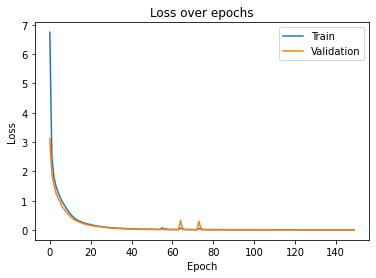

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

# Performance of model

In [ ]:
model.load_weights("new_final (2).h5")

In [ ]:
predictions = model.predict([X_temporal_test,X_demographic_test])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(Y_cases_test, predictions))
rms

4733.517296894562

In [ ]:
predictions[0][:30]


array([0.], dtype=float32)

In [ ]:
Y_cases_test

array([   0., 2045., 1967., ...,    0.,   52., 1747.], dtype=float32)

In [ ]:
display_limit = 30
for inputs, pred_cases, exp_cases in zip(X_temporal_test,predictions[:display_limit], Y_cases_test[:display_limit]):
    print("================================================")
    print(inputs)
    print("Expected cases:", exp_cases, " Prediction:", pred_cases )

Streaming output truncated to the last 5000 lines.
   0.00000000e+00  0.00000000e+00]
 [ 7.60000000e+01  3.06593664e-02  2.03213736e-01  1.93659142e-01
   3.52803826e-01  1.60962995e-03  8.31267703e-03  2.25515980e-02
   2.26690024e-02  1.00000001e-01  5.92030697e-02  3.43343347e-01
  -4.12412405e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  3.16335797e-01  9.91804525e-02
   1.40085027e-01  8.57528150e-02  3.99920419e-02  0.00000000e+00
   0.00000000e+00 -2.37412229e-01  2.57170737e-01  2.16065735e-01
   3.53555322e-01  1.09443814e-01  5.04515350e-01  8.67593626e-04
   0.00000000e+00  0.00000000e+00]
 [ 7.80000000e+01  3.36014740e-02  2.03213736e-01  1.93659142e-01
   3.52803826e-01  1.66327402e-03  7.93153979e-03  2.25515980e-02
   2.26690024e-02  1.00000001e-01  5.92030697e-02  3.43343347e-01
  -4.24424410e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.

In [67]:
import tensorflow as tf 
classifierLoad = tf.keras.models.load_model('new_final (2).h5')

In [68]:
# Sklearn regression model evaluation functions
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [69]:
predictions_test = classifierLoad.predict([X_temporal_test,X_demographic_test])

In [70]:
predictions_train = classifierLoad.predict([X_temporal_train,X_demographic_train])

In [71]:
# Evaluation the models against test data using MAE, RMSE and R2
print("    MAE", mean_absolute_error(Y_cases_test, predictions_test))
print("    RMSE", sqrt(mean_squared_error(Y_cases_test, predictions_test)))
print("    R2", r2_score(Y_cases_test, predictions_test))

    MAE 209.59059
    RMSE 4305.109522416357
    R2 0.7301711824511744


In [72]:
# Evaluation the models against test data using MAE, RMSE and R2
print("    MAE", mean_absolute_error(Y_cases_train, predictions_train))
print("    RMSE", sqrt(mean_squared_error(Y_cases_train, predictions_train)))
print("    R2", r2_score(Y_cases_train, predictions_train))

    MAE 350.80716
    RMSE 8093.308594141212
    R2 0.5161515622871758
